<a href="https://colab.research.google.com/github/vishwaparekh/NYC_Green_Taxi_2015_Analysis/blob/master/NYC_GreenTaxi_Sep2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Read in the data
import pandas as pd

df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv')
#Visualize first few columns 
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,0.00,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,0.00,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [0]:
# Remove the column with no values
df = df.drop('Ehail_fee',axis=1)

In [0]:
#Let's look at summary statistics of the data (mean, median, std.dev, max, min)
import numpy as np
import pandas as pd
df_sumStat = pd.DataFrame()
#df_sumStat['features'] = df.columns
allMeans = []
allStd = []
allMin = []
allMax = []
allFeatures = []
for col in df.columns:
  if not isinstance(df[col][0],str):
    allFeatures.append(col)
    allMeans.append(df[col].mean())
    allStd.append(df[col].std())
    allMax.append(df[col].max())
    allMin.append(df[col].min())

df_sumStat['features']=allFeatures
df_sumStat['mean'] = allMeans
df_sumStat['std_dev'] = allStd
df_sumStat['max'] = allMax
df_sumStat['min'] = allMin

print(df_sumStat)

                 features       mean    std_dev         max         min
0                VendorID   1.782045   0.412857    2.000000    1.000000
1              RateCodeID   1.097653   0.635944   99.000000    1.000000
2        Pickup_longitude -73.830839   2.776082    0.000000  -83.319077
3         Pickup_latitude  40.691144   1.530882   43.177261    0.000000
4       Dropoff_longitude -73.837278   2.677911    0.000000  -83.427841
5        Dropoff_latitude  40.692905   1.476698   42.799343    0.000000
6         Passenger_count   1.370598   1.039426    9.000000    0.000000
7           Trip_distance   2.968141   3.076621  603.100000    0.000000
8             Fare_amount  12.543198  10.082781  580.500000 -475.000000
9                   Extra   0.351280   0.366310   12.000000   -1.000000
10                MTA_tax   0.486641   0.085045    0.500000   -0.500000
11             Tip_amount   1.235727   2.431476  300.000000  -50.000000
12           Tolls_amount   0.123105   0.891014   95.750000  -15



---


Let's look at the above summary carefully. There are some issues here. The values manually entered by the cab drivers are not consistent.
1. The minimum on passenger count is 0. How can a taxi be run with no passengers. We need to check if there was any fare charged for such rides
2. There are negative amounts in tip, tolls, total amount. These are random values. Value charged to the customer cannot be negaitve. We need to check these as well
3. Some of the latitude and longitude positions are out of NYC, in fact some of them are on the equator. !! 



---
Let's tabulate & visualize these incosistencies. 


In [0]:
# First we will visualize the data when there we no passengers!
#Filter the data frame to passenger count = 0
df_filtered = df[df['Passenger_count']==0]
import numpy as np
import pandas as pd
df_sumStat_filtered = pd.DataFrame()
#df_sumStat['features'] = df.columns
allMeans = []
allStd = []
allMin = []
allMax = []
allFeatures = []
for col in df_filtered.columns:
  if not isinstance((df_filtered[col].values)[0],str):
    allFeatures.append(col)
    allMeans.append(df_filtered[col].mean())
    allStd.append(df_filtered[col].std())
    allMax.append(df_filtered[col].max())
    allMin.append(df_filtered[col].min())

df_sumStat_filtered['features']=allFeatures
df_sumStat_filtered['mean'] = allMeans
df_sumStat_filtered['std_dev'] = allStd
df_sumStat_filtered['max'] = allMax
df_sumStat_filtered['min'] = allMin

print(df_sumStat_filtered)

                 features       mean    std_dev         max         min
0                VendorID   1.529545   0.499694    2.000000    1.000000
1              RateCodeID   5.834091   8.936487   99.000000    2.000000
2        Pickup_longitude -72.745548   9.260002    0.000000  -74.177498
3         Pickup_latitude  40.127734   5.108416   41.032986    0.000000
4       Dropoff_longitude -73.075195   7.843636    0.000000  -74.181679
5        Dropoff_latitude  40.311693   4.327440   41.032990    0.000000
6         Passenger_count   0.000000   0.000000    0.000000    0.000000
7           Trip_distance   1.884432   3.484426   28.100000    0.000000
8             Fare_amount  11.340091  20.058841  132.000000 -132.000000
9                   Extra   0.006818   0.082384    1.000000    0.000000
10                MTA_tax   0.012500   0.078151    0.500000    0.000000
11             Tip_amount   0.771773   2.379410   23.000000    0.000000
12           Tolls_amount   0.111432   0.833100    9.750000    0



---
It looks like there was amount charged even when there were no passengers in the cab. This could be because the cab driver was to lazy to count and enter the number of passengers in the cab. As the other values such as trip_distance are computed automatically, it would be a good idea to just drop the passenger_count column as it may not be accurate.


---


---




                 features       mean    std_dev        max         min
0                VendorID   1.454849   0.497995   2.000000    1.000000
1              RateCodeID   3.358021   2.567676  99.000000    1.000000
2        Pickup_longitude -72.361352  10.623561   0.000000  -74.244965
3         Pickup_latitude  39.920885   5.861163  41.029839    0.000000
4       Dropoff_longitude -71.922227  11.985224   0.000000  -74.244965
5        Dropoff_latitude  39.679273   6.612462  41.030121    0.000000
6         Passenger_count   1.301108   0.919218   9.000000    0.000000
7           Trip_distance   1.925057   3.076982  48.500000    0.000000
8             Fare_amount  -3.771657  17.728457   0.000000 -475.000000
9                   Extra  -0.122856   0.272109   0.000000   -1.000000
10                MTA_tax  -0.162544   0.241402   0.500000   -0.500000
11             Tip_amount  -0.020099   0.664356   0.000000  -50.000000
12           Tolls_amount  -0.001428   0.337421  11.750000  -15.290000
13  im

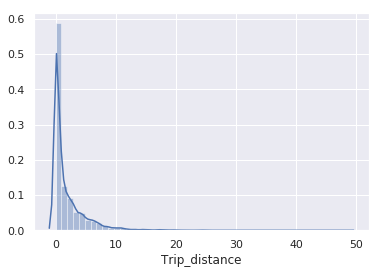

In [0]:
# Next we will visualize the data when negative fare was charged
#Filter the data frame to passenger count = 0
import seaborn as sns
import matplotlib.pyplot as plt
df_filtered = df[df['Total_amount']<=0]
import numpy as np
import pandas as pd
df_sumStat_filtered = pd.DataFrame()
#df_sumStat['features'] = df.columns
allMeans = []
allStd = []
allMin = []
allMax = []
allFeatures = []
for col in df_filtered.columns:
  if not isinstance((df_filtered[col].values)[0],str):
    allFeatures.append(col)
    allMeans.append(df_filtered[col].mean())
    allStd.append(df_filtered[col].std())
    allMax.append(df_filtered[col].max())
    allMin.append(df_filtered[col].min())

df_sumStat_filtered['features']=allFeatures
df_sumStat_filtered['mean'] = allMeans
df_sumStat_filtered['std_dev'] = allStd
df_sumStat_filtered['max'] = allMax
df_sumStat_filtered['min'] = allMin

print(df_sumStat_filtered)

sns.distplot(df_filtered['Trip_distance'])
#This shows that the incorrect fare amounts were charged for relatively very short trips


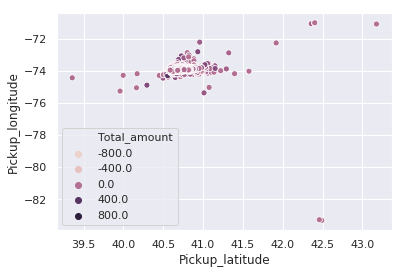

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
df_filtered = df[df['Pickup_latitude']>0]
df_filtered = df_filtered[df_filtered['Pickup_longitude']<0]
df_filtered = df_filtered[df_filtered['Dropoff_latitude']>0]
df_filtered = df_filtered[df_filtered['Dropoff_longitude']<0]
# We are going to scatter plot the filtered latitude, longitude and colormap it based on total amount earned
ax = sns.scatterplot(x="Pickup_latitude", y="Pickup_longitude", data=df_filtered,hue='Total_amount')



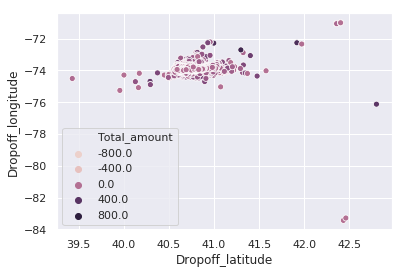

In [0]:
ax = sns.scatterplot(x="Dropoff_latitude", y="Dropoff_longitude", data=df_filtered, hue="Total_amount")

 Let's clean up the data. We will do the following
1. Drop the passenger_count column
2. Remove the rows with negative amounts charged across tip to total amount
3. Remove the rows with strange latitude and longitude locations

In [0]:
df_cleaned = df[df['Pickup_latitude']>0]
df_cleaned = df_cleaned[df_cleaned['Pickup_longitude']<0]
df_cleaned = df_cleaned[df_cleaned['Dropoff_latitude']>0]
df_cleaned = df_cleaned[df_cleaned['Dropoff_longitude']<0]
df_cleaned = df_cleaned[df_cleaned['Total_amount']>0]
df_cleaned = df_cleaned[df_cleaned['Trip_distance']>0]
df_cleaned = df_cleaned.drop('Passenger_count',axis=1)
# Let's resummarize the data
df_sumStat = pd.DataFrame()
#df_sumStat['features'] = df.columns
allMeans = []
allStd = []
allMin = []
allMax = []
allFeatures = []
for col in df_cleaned.columns:
  if not isinstance((df_cleaned[col].values)[0],str):
    allFeatures.append(col)
    allMeans.append(df_cleaned[col].mean())
    allStd.append(df_cleaned[col].std())
    allMax.append(df_cleaned[col].max())
    allMin.append(df_cleaned[col].min())

df_sumStat['features']=allFeatures
df_sumStat['mean'] = allMeans
df_sumStat['std_dev'] = allStd
df_sumStat['max'] = allMax
df_sumStat['min'] = allMin

print(df_sumStat)



                 features       mean    std_dev         max        min
0                VendorID   1.784016   0.411503    2.000000   1.000000
1              RateCodeID   1.067990   0.506204    6.000000   1.000000
2        Pickup_longitude -73.935450   0.043281  -71.083611 -83.319077
3         Pickup_latitude  40.748426   0.056815   43.177261  39.356937
4       Dropoff_longitude -73.934628   0.051838  -72.213150 -83.427841
5        Dropoff_latitude  40.746118   0.057756   42.799343  39.429359
6           Trip_distance   3.011760   3.076229  603.100000   0.010000
7             Fare_amount  12.583454   9.552903  580.500000   0.000000
8                   Extra   0.355520   0.365099    1.000000  -0.720000
9                 MTA_tax   0.491883   0.063189    0.500000   0.000000
10             Tip_amount   1.236649   2.305841  300.000000   0.000000
11           Tolls_amount   0.124652   0.889998   95.750000   0.000000
12  improvement_surcharge   0.295195   0.037660    0.300000   0.000000
13    

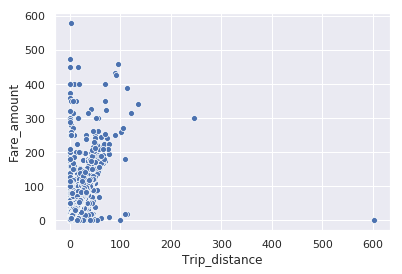

In [0]:
# Some visualizations on the cleaned data
#ax = sns.distplot(df_cleaned['Trip_distance'])
ax = sns.scatterplot(x="Trip_distance", y="Fare_amount", data=df_cleaned)

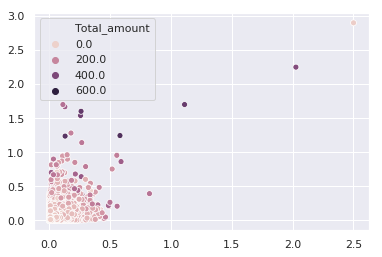

In [0]:
#Scatter plot of trip distance in terms of lattitude and longitude
abs_lat_diff = (df_cleaned['Dropoff_latitude'] - df_cleaned['Pickup_latitude']).abs()
abs_lon_diff = (df_cleaned['Dropoff_longitude'] - df_cleaned['Pickup_longitude']).abs()
ax = sns.scatterplot(x=abs_lat_diff, y=abs_lon_diff, hue=df_cleaned["Total_amount"])

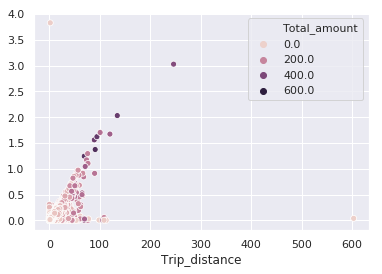

In [0]:
# There should be a direct relationship between the trip_distance & trip_distance calculated using latitude and longitude
abs_ll_diff = np.sqrt(abs_lat_diff**2 + abs_lon_diff**2)
ax = sns.scatterplot(x=df_cleaned['Trip_distance'], y=abs_ll_diff, hue=df_cleaned["Total_amount"])

In [0]:
# Grouping the data by the hour
df_cleaned['pickup_hour'] = (pd.to_datetime(df_cleaned['lpep_pickup_datetime'])).dt.hour
df_cleaned['dropoff_hour'] = (pd.to_datetime(df_cleaned['Lpep_dropoff_datetime'])).dt.hour



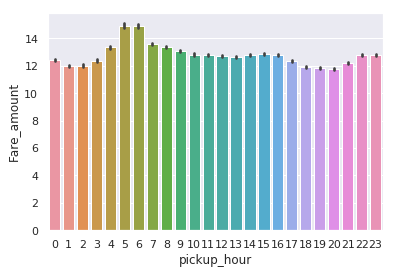

In [0]:
#Let's visualize how the fares vary by pickup hours

ax = sns.barplot(x='pickup_hour', y='Fare_amount',data=df_cleaned)



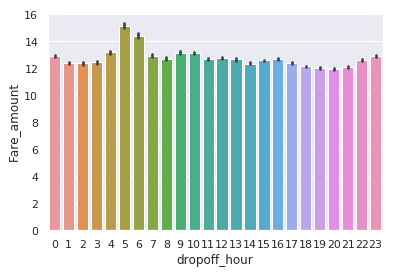

In [0]:
# How about drop off hours
ax = sns.barplot(x='dropoff_hour', y='Fare_amount',data=df_cleaned)

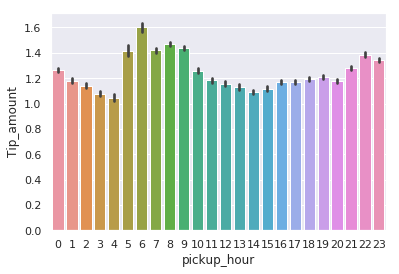

In [0]:
#How do tips vary with pickup_hour

ax1 = sns.barplot(x='pickup_hour', y='Tip_amount',data=df_cleaned)




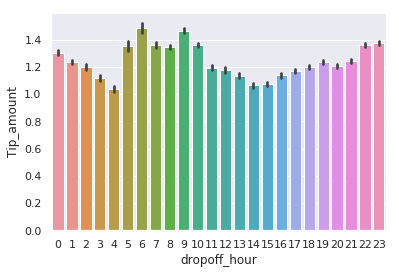

In [0]:
# How about drop off hours
ax2 = sns.barplot(x='dropoff_hour', y='Tip_amount',data=df_cleaned)

[(40.4, 41.2)]

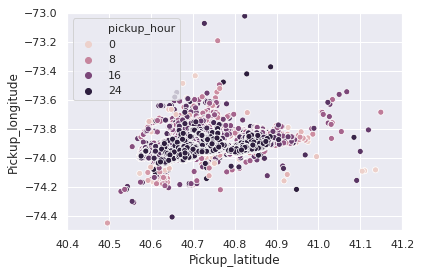

In [0]:
# Let's see how pick up times relate to pick up places. This could tell us where the rush is at different times of the data.
ax = sns.scatterplot(x='Pickup_latitude',y='Pickup_longitude', data=df_cleaned, hue="pickup_hour")
ax.set(ylim=(-74.5, -73))
ax.set(xlim=(40.4, 41.2))


We can see that there are some areas on the map that are areas of frequent pick up around midnight. 

In [0]:
# Let's create a model for drivers to understand how to get best tips
# We will create a simple regression model to see which combination of parameters yield the best tips
#While tip is a very subjective variable - it depends on the rider(s), driver, their communication skills, etc. Here, we will try to objectively determine the optimal set of variabels for good tips

# We will build a model using decision trees because it is easier to explain
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
model = DecisionTreeRegressor(max_depth=5)
X = df_cleaned[['pickup_hour','dropoff_hour','Pickup_latitude','Dropoff_latitude','Pickup_longitude','Dropoff_longitude']].values
Y = df_cleaned['Tip_amount'].values

x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.3, shuffle= True)
model.fit(x_train,y_train)



DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

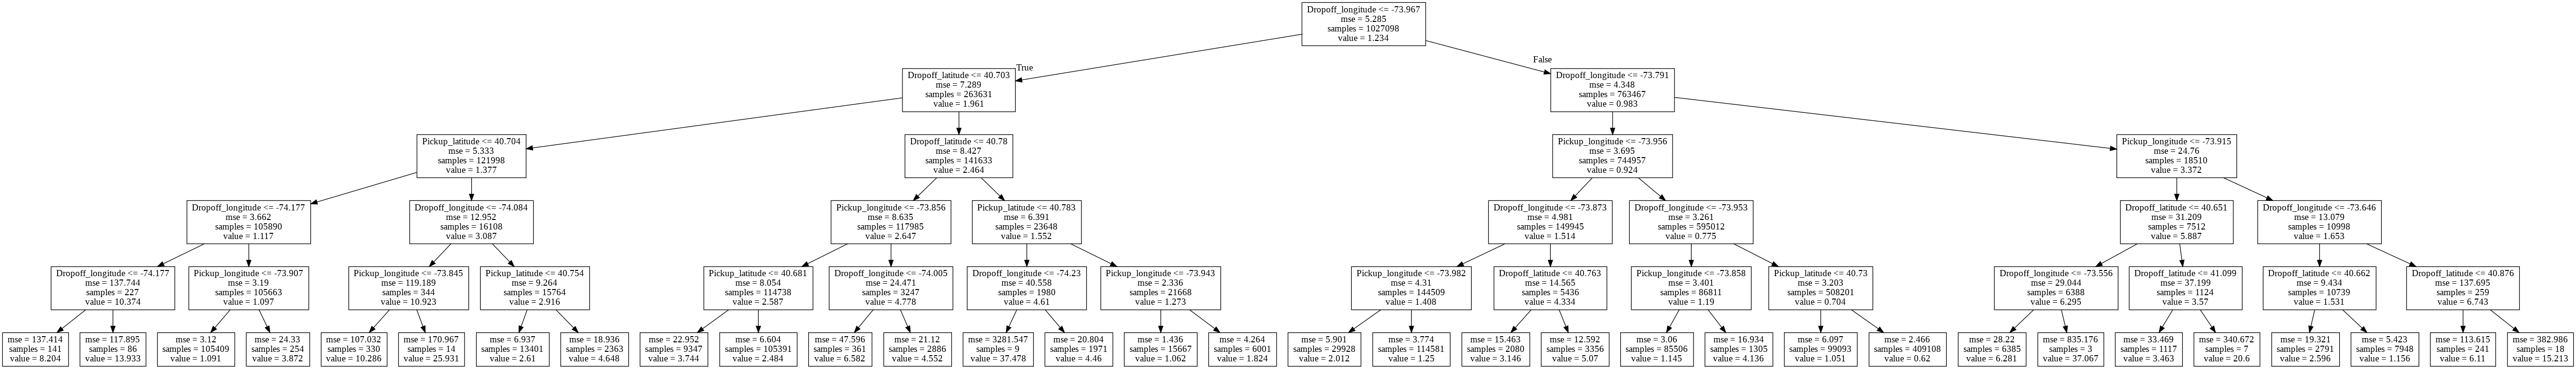

In [0]:
from IPython.display import Image  
import pydotplus

# Export Decision Tree
tip_dt_data = export_graphviz(model, out_file=None, 
                                feature_names=['pickup_hour','dropoff_hour','Pickup_latitude','Dropoff_latitude','Pickup_longitude','Dropoff_longitude'],  
                                class_names='Tip_amount')

# Draw graph
graph = pydotplus.graph_from_dot_data(tip_dt_data)  

# Show graph
Image(graph.create_png())

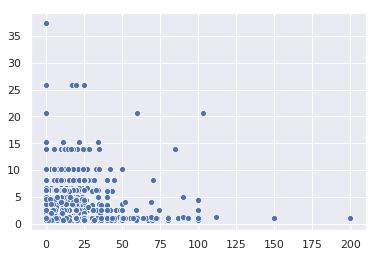

In [0]:
y_test = model.predict(x_valid)
sns.scatterplot(y_valid,y_test)

[(40.4, 41.2)]

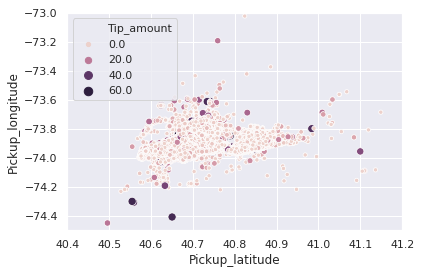

In [0]:
# So the pickup and dropoff locations play a very important role in the amount of tip the driver gets. It makes sense because it determines the distance traveled by the driver, which is proportional to the fare charged, which is in turn proportional to the tip amount
# Let's visualize the data when the tip values are in a more reasonable range (We can play with this variable)
df_filtered = df_cleaned[df_cleaned['Tip_amount']<50]
ax = sns.scatterplot(x='Pickup_latitude',y='Pickup_longitude', data=df_filtered, size = "Tip_amount", hue="Tip_amount")
ax.set(ylim=(-74.5, -73))
ax.set(xlim=(40.4, 41.2))

We can play with these variables further and see what is going on...